In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'code')))


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Leer archivos parquet.
df = pd.read_parquet(r'reviews.parquet')

In [3]:
# Mostrar las primeras filas del DataFrame
print(df.head())

# Verificar las dimensiones del DataFrame
print(f"Dimensiones del DataFrame: {df.shape}")

# Inspeccionar el tipo de datos de cada columna
print(df.info())


                       id                 user_id  stars  \
0  YByDh56Hl11HoYdBm-uArA  9hhRs_n85m-jsKOXp3jt7Q    1.0   
1  3vwdkRRoUe4PewzD8HvQbQ  -BX5x3Ys-2JzFba3LiWlHA    1.0   
2  LX2or1ZvpaO8x9Xb8UxF5Q  tftplxTcJYHU8nrwCwtzFg    2.0   
3  LWQJo1dFvAgJQF_dxN6JCA  G_eZLhf1Kw5WBpMlXHizNQ    4.0   
4  yQJXhZIF6_VMC5gY7gBDAw  iYpCMhEqsped1647fF_u-A    1.0   

                                                text                date  \
0  Went there at 4am and there was only one waitr... 2016-05-08 08:49:25   
1  I had an immensely frustrating experience here... 2017-08-30 10:52:52   
2  Food was decent, staff were accommodating. Res... 2015-03-21 14:00:29   
3  The staff here was great. We had a bunch of pe... 2014-03-16 13:59:31   
4  Food was awful!  Hamburger was burnt and cold.... 2018-08-12 15:32:47   

  origin id_business  
0      Y       41110  
1      Y       41110  
2      Y       41110  
3      Y       41110  
4      Y       41110  
Dimensiones del DataFrame: (4835650, 7)
<cla

In [4]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: id
1: user_id
2: stars
3: text
4: date
5: origin
6: id_business


- Observaciones

Dimensiones del DataFrame:

El dataset contiene 4,835,650 filas y 7 columnas, lo cual indica un tamaño significativo que puede requerir optimizaciones de memoria para operaciones futuras.
Las columnas son variadas: ID de usuario, texto, fecha, calificación, y otros identificadores.

Tipos de Datos:

La columna date ya está correctamente convertida a datetime64[ns].

La columna stars está representada como float64, lo cual es apropiado para operaciones numéricas.

Las demás columnas son de tipo object, lo cual está bien para identificadores (id, user_id, id_business) y texto.

Uso de Memoria:

El uso de memoria es de aproximadamente 258.3 MB, lo cual es razonable pero podría optimizarse al convertir tipos de datos si se enfrentan problemas de rendimiento.


1. Revisión General de Datos

- Tipos de Datos: Verificar que los tipos de datos sean los adecuados para el análisis.

date ya está en formato datetime64[ns].

stars es numérico, lo cual es correcto para análisis estadístico.


- Duplicados:

Buscar y eliminar registros duplicados si corresponde.

In [5]:
print(f"Duplicados: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicados: 0


- Valores Nulos:

Identificar y maneja valores nulos.

In [6]:
print(df.isnull().sum())

id                   0
user_id              0
stars                0
text           1014133
date                 0
origin               0
id_business          0
dtype: int64


In [7]:
# Eliminar Filas con text Nulo
df = df.dropna(subset=['text'])
print(f"Nueva cantidad de filas: {len(df)}")

Nueva cantidad de filas: 3821517


In [8]:
# Verificar que valores nulos no existan
print(df['text'].isnull().sum())

0


Explorar la distribución de fechas. Esto ayuda a verificar si hay valores atípicos o datos inconsistentes:

In [9]:
# Rango de fechas
print("Rango de fechas:")
print(df['date'].min(), "a", df['date'].max())

Rango de fechas:
1990-12-31 00:00:00 a 2022-01-19 19:48:13


In [10]:
# Filtrar datos previos al 2000
old_reviews = df[df['date'] < '2000-01-01']
print(f"Cantidad de reseñas previas al 2000: {len(old_reviews)}")

Cantidad de reseñas previas al 2000: 1


In [12]:
# Eliminar fechas anteriores al 2000
reviews_df = df[df['date'] >= '2000-01-01']
print(f"Datos restantes después de filtrar: {reviews_df.shape}")

Datos restantes después de filtrar: (3821516, 7)


In [13]:
# Definir el rango de fechas
start_date = "2020-01-01"
end_date = "2022-12-31"

# Filtrar las filas que están dentro del rango de fechas
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Confirmar el rango de fechas en el DataFrame filtrado
print(df_filtered['date'].min(), df_filtered['date'].max())

# Verificar las dimensiones del DataFrame filtrado
print(f"Dimensiones después del filtrado: {df_filtered.shape}")

2020-01-01 00:00:33.835000 2022-01-19 19:48:13
Dimensiones después del filtrado: (813267, 7)


2. Análisis Descriptivo

In [14]:
# Estadísticas descriptivas
print(df_filtered.describe(include='all'))

                            id                 user_id          stars  \
count                   813267                  813267  813267.000000   
unique                  813267                  547465            NaN   
top     BV7RT7FR0xo1KhrYlDly8Q  vmUqcqMjlWoBM6qfmUXgyQ            NaN   
freq                         1                     138            NaN   
mean                       NaN                     NaN       4.058720   
min                        NaN                     NaN       1.000000   
25%                        NaN                     NaN       4.000000   
50%                        NaN                     NaN       5.000000   
75%                        NaN                     NaN       5.000000   
max                        NaN                     NaN       5.000000   
std                        NaN                     NaN       1.382188   

              text                           date  origin id_business  
count       813267                         813267  

Revisión de la Columna stars (Calificaciones)

La columna stars tiene un valor promedio de 4.06, lo que indica una tendencia hacia calificaciones altas, con un rango entre 1 y 5.

Visualización de la distribución de stars

Es útil ver cómo se distribuyen las calificaciones de las reseñas:

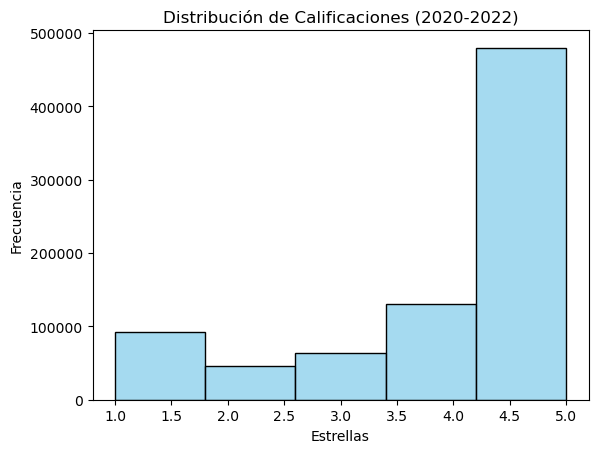

In [15]:
sns.histplot(df_filtered['stars'], bins=5, kde=False, color='skyblue')
plt.title('Distribución de Calificaciones (2020-2022)')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

Análisis de la Columna user_id

Hay 547,465 usuarios únicos (según el conteo en la columna user_id), pero el valor más frecuente es vmUqcqMjlWoBM6qfmUXgyQ, lo que indica que algunos usuarios han dejado múltiples reseñas.

Análisis de los usuarios más activos

Para ver qué usuarios dejaron más reseñas:

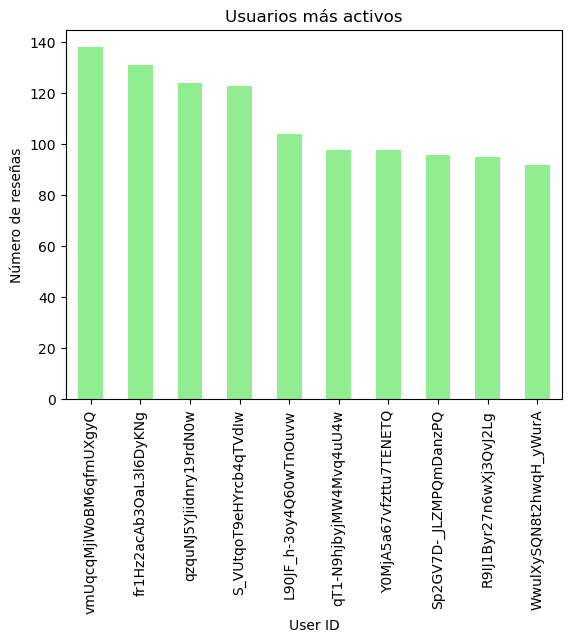

In [16]:
# Contar reseñas por usuario
user_activity = df_filtered['user_id'].value_counts().head(10)

# Visualización
user_activity.plot(kind='bar', color='lightgreen')
plt.title('Usuarios más activos')
plt.xlabel('User ID')
plt.ylabel('Número de reseñas')
plt.show()

Revisión de la Columna text (Contenido de las Reseñas)

La columna text tiene 765,435 reseñas únicas. Esto sugiere que la mayoría de las reseñas son diferentes, lo cual es bueno para análisis de texto.

Preprocesamiento del texto
Aplicar un preprocesamiento básico, como la eliminación de caracteres especiales, convertir todo a minúsculas, etc.

In [17]:
# Limpiar el texto
df_filtered['text_clean'] = df_filtered['text'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Ver las primeras filas del texto limpio
print(df_filtered[['text', 'text_clean']].head())

                                                 text  \
12  Denny's is a great restaurant for seniors. We ...   
16  Ok I know!! It's DENNY"S!! ("Lenny's! LOL! Sho...   
18  Worst Denny's I've ever been too, mold all ove...   
19  If you want bad service and an assistant manag...   
20  I went there with my uncle and grandma on Sund...   

                                           text_clean  
12  dennys is a great restaurant for seniors we go...  
16  ok i know its dennys lennys lol showing my age...  
18  worst dennys ive ever been too mold all over t...  
19  if you want bad service and an assistant manag...  
20  i went there with my uncle and grandma on sund...  


/tmp/ipykernel_5337/1505591741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text_clean'] = df_filtered['text'].str.replace(r'[^\w\s]', '', regex=True).str.lower()


Análisis de la Columna id_business

La columna id_business muestra la relación entre las reseñas y los negocios. Hay 38,459 negocios únicos, pero el negocio más común tiene muchas reseñas (1166).

Negocios más reseñados

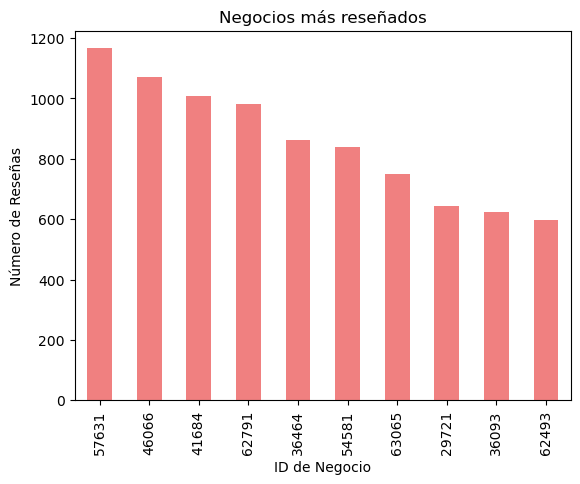

In [18]:
# Contar reseñas por negocio
negocios_más_reseñados = df_filtered['id_business'].value_counts().head(10)

# Visualización
negocios_más_reseñados.plot(kind='bar', color='lightcoral')
plt.title('Negocios más reseñados')
plt.xlabel('ID de Negocio')
plt.ylabel('Número de Reseñas')
plt.show()


Guardar Resultados Intermedios

In [19]:
df_filtered.to_parquet('reviews_cleaned_2020_2022.parquet', index=False)